In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [6]:
df.info

<bound method DataFrame.info of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]>

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
df.shape

(11162, 17)

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


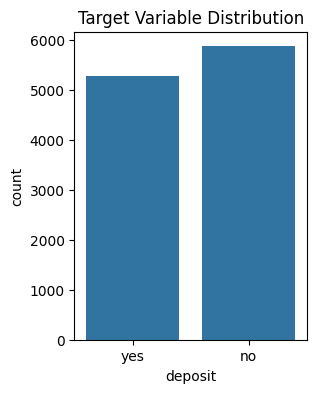

In [10]:
#analysing the target
plt.figure(figsize=(3,4))
sns.countplot(data=df, x="deposit")
plt.title("Target Variable Distribution")
plt.show()

#Almost equal number of customers who subscribed and did nor subscribe



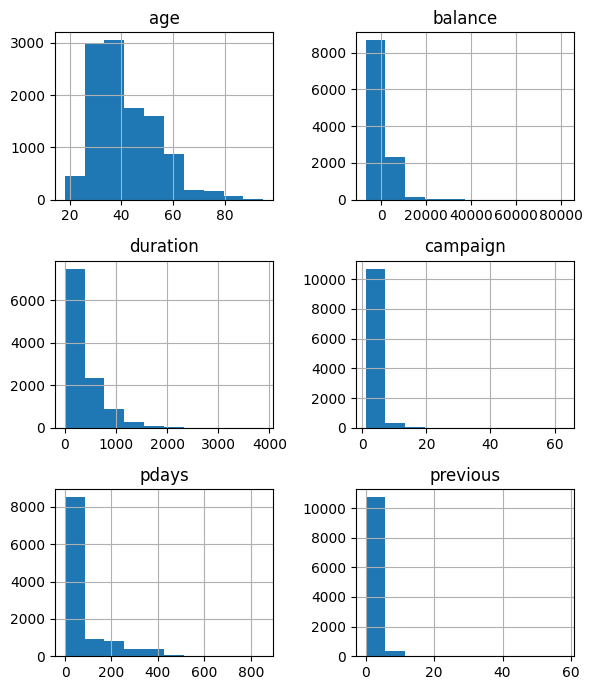

In [11]:
#numerical distribution
num_cols = ['age','balance','duration','campaign','pdays','previous']

df[num_cols].hist(figsize=(6,7))
plt.tight_layout()
plt.show()


Most values are low with a few very high outliers, so all numeric features are strongly right-skewed

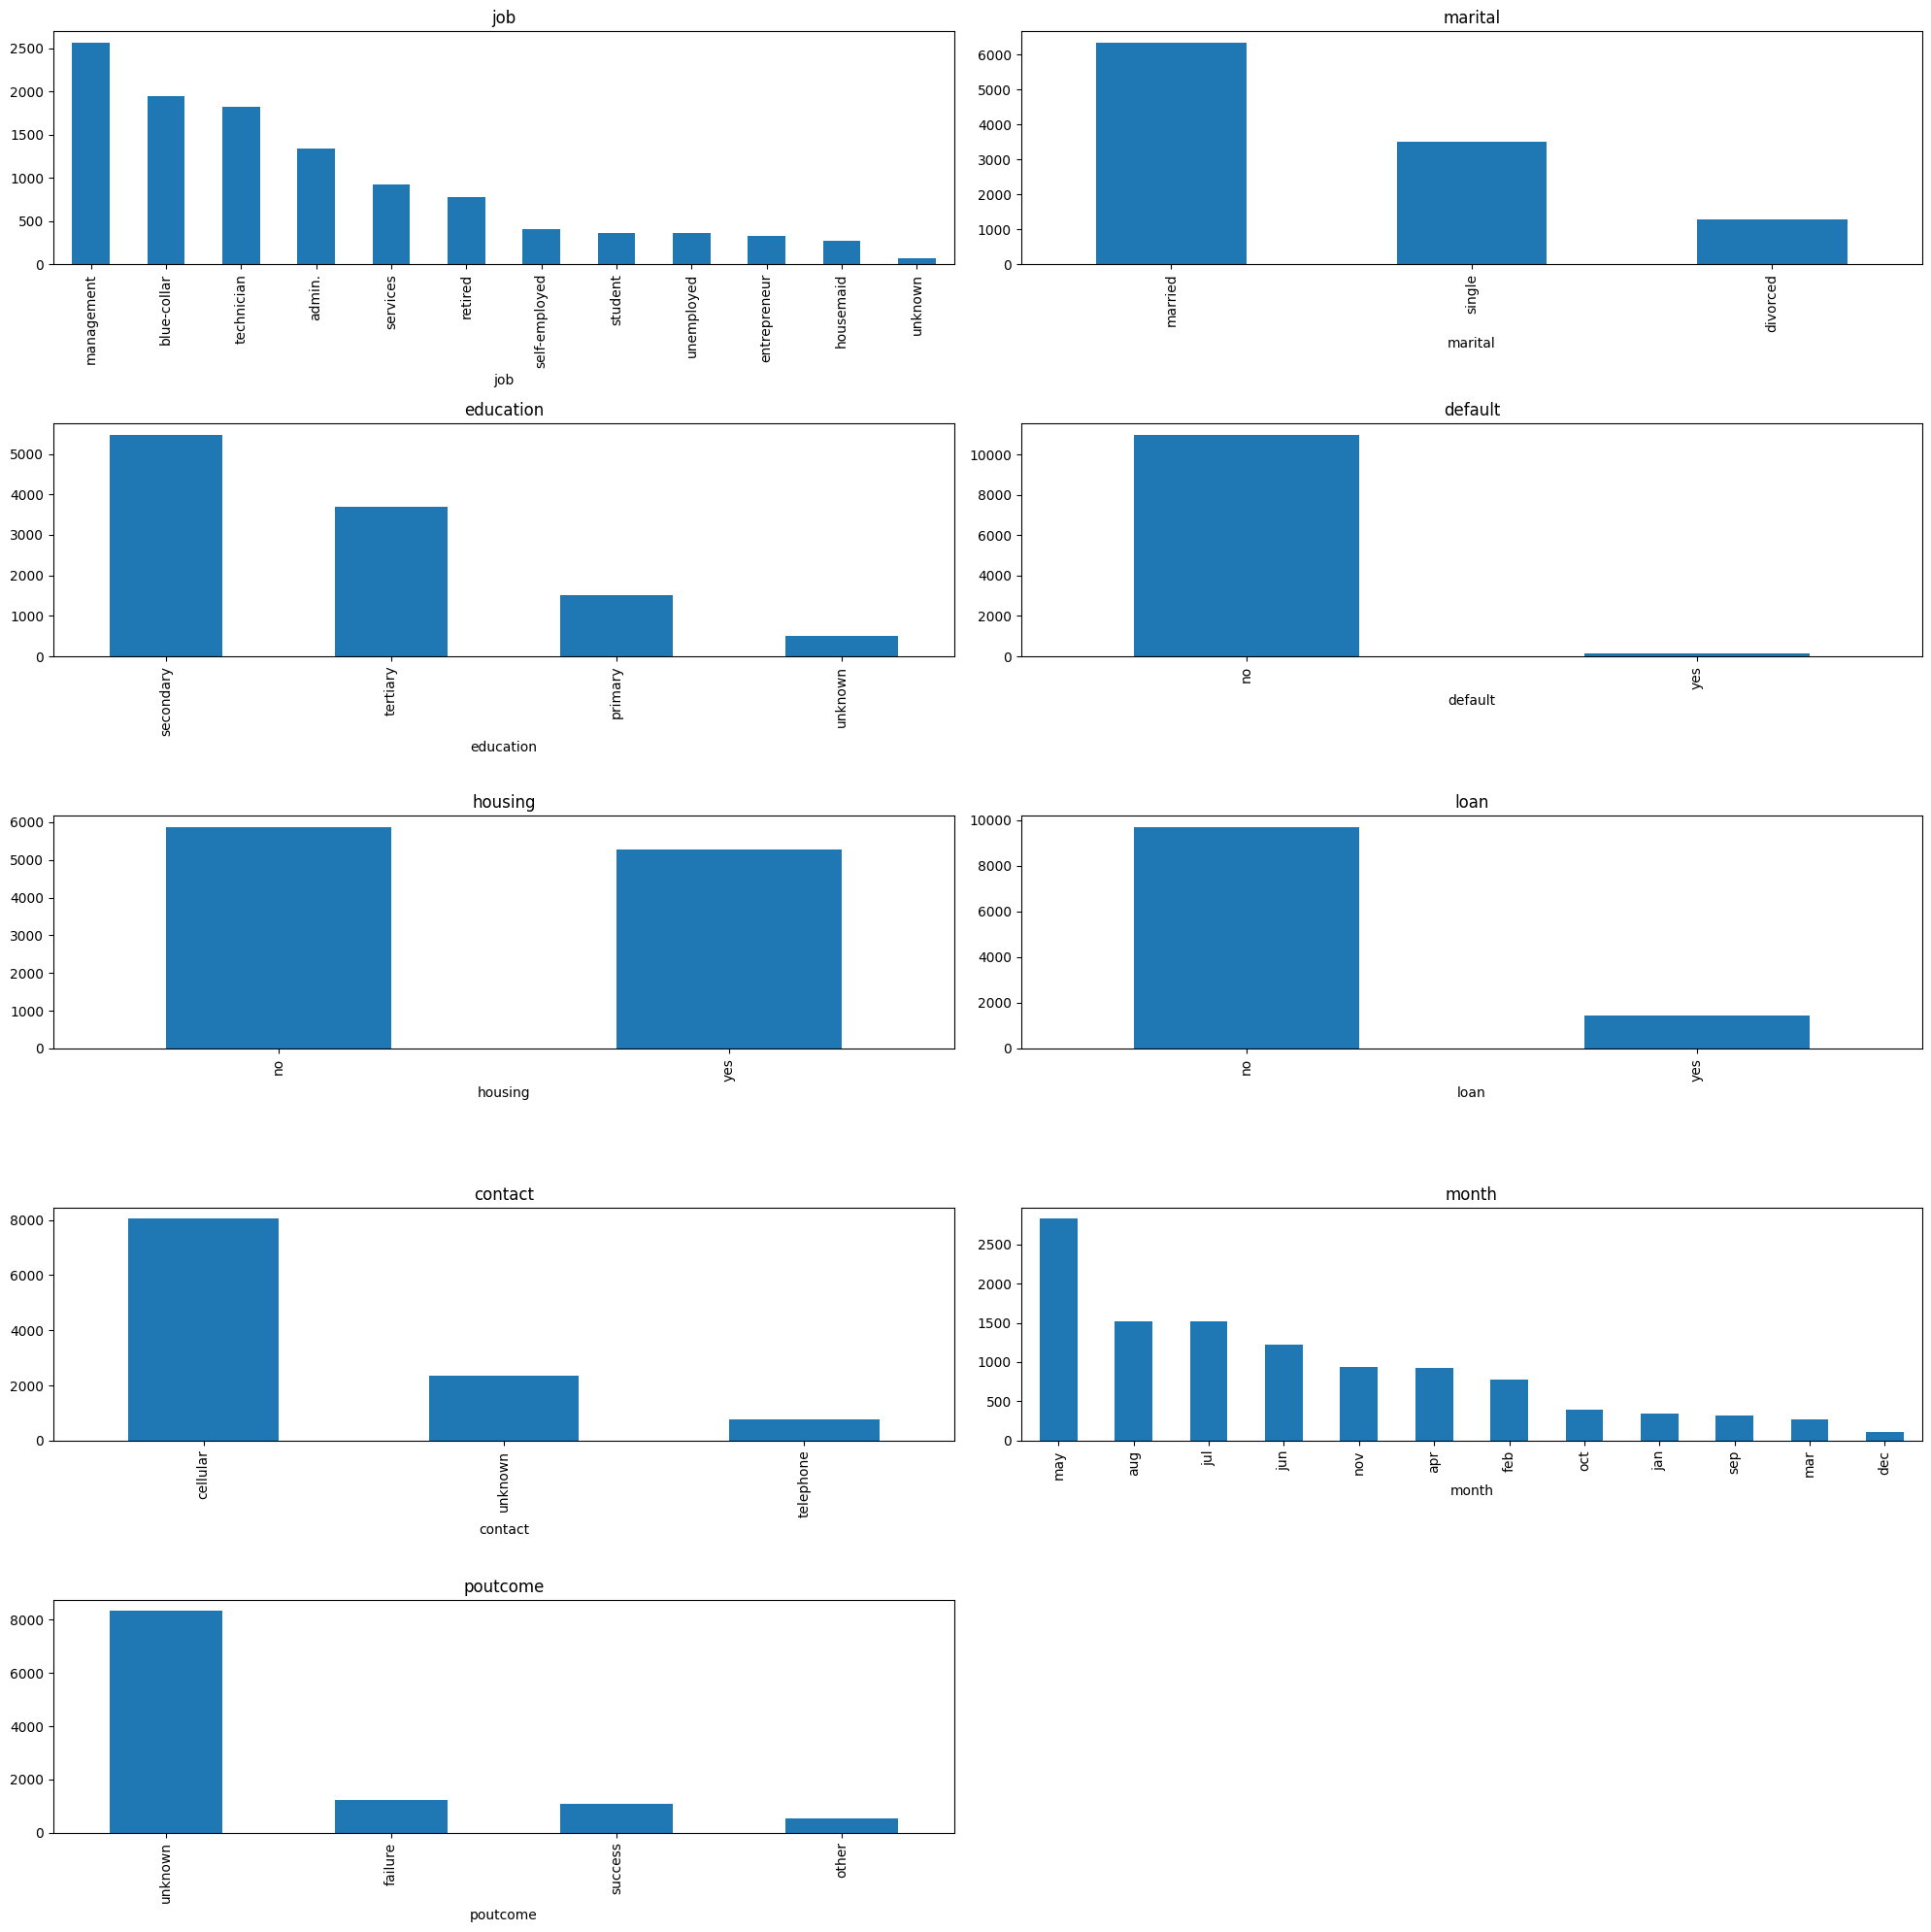

In [12]:
#categorical distribution
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']

plt.figure(figsize=(20,20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5,2,i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()


In [19]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # capping outliers
        df[col] = df[col].clip(lower, upper)

    return df

In [20]:
cleaned_df = handle_outliers(df, num_cols)

In [21]:
print(cleaned_df)


        age          job  marital  education default  balance housing loan  \
0      59.0       admin.  married  secondary      no     2343     yes   no   
1      56.0       admin.  married  secondary      no       45      no   no   
2      41.0   technician  married  secondary      no     1270     yes   no   
3      55.0     services  married  secondary      no     2476     yes   no   
4      54.0       admin.  married   tertiary      no      184      no   no   
...     ...          ...      ...        ...     ...      ...     ...  ...   
11157  33.0  blue-collar   single    primary      no        1     yes   no   
11158  39.0     services  married  secondary      no      733      no   no   
11159  32.0   technician   single  secondary      no       29      no   no   
11160  43.0   technician  married  secondary      no        0      no  yes   
11161  34.0   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign   pdays  previou

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [26]:
#label encoding
label_cols = ['default', 'housing', 'loan', 'deposit']
le = LabelEncoder()

for col in label_cols:
    cleaned_df[col] = le.fit_transform(cleaned_df[col])

# One-hot encode multi-category columns
onehot_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

cleaned_df = pd.get_dummies(cleaned_df, columns=onehot_cols, drop_first=True)






In [28]:
#train test split

X = cleaned_df.drop("deposit", axis=1)
y = cleaned_df["deposit"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [29]:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

scaler = StandardScaler()

# Fit only on training data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])


In [30]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (8929, 42)
X_test shape: (2233, 42)


NAIVE BAYES

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Train model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluation
print("Naive Bayes Results")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Naive Bayes Results
Accuracy : 0.7048813255709807
Precision: 0.7955555555555556
Recall   : 0.5075614366729678

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.88      0.76      1175
           1       0.80      0.51      0.62      1058

    accuracy                           0.70      2233
   macro avg       0.73      0.70      0.69      2233
weighted avg       0.73      0.70      0.69      2233



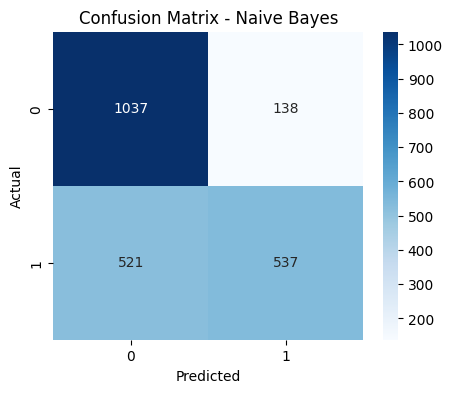

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_nb = nb.predict(X_test)

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


according to confusion matrix Naive Bayes gives okay accuracy but misses many actual “yes” cases, so it performs the weakest,


DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print("Decision Tree Results")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Results
Accuracy : 0.7917599641737573
Precision: 0.7831900668576887
Recall   : 0.775047258979206

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1175
           1       0.78      0.78      0.78      1058

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



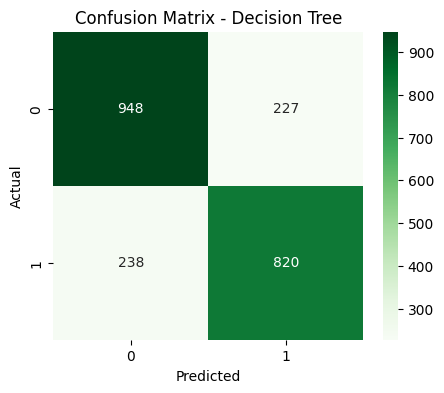

In [34]:
# Predictions
y_pred_dt = dt.predict(X_test)

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree works better and gives more balanced predictions but is still not the top performer.


SVM

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Train model
svm_model = SVC(kernel='rbf', C=1, gamma='scale',probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print(" SVM Results")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 SVM Results
Accuracy : 0.8557993730407524
Precision: 0.8216783216783217
Recall   : 0.888468809073724

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1175
           1       0.82      0.89      0.85      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



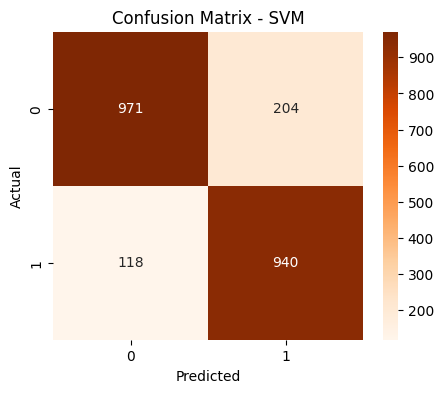

In [40]:
# Predictions
y_pred_svm = svm_model.predict(X_test)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM performs the best because it learns complex patterns and predicts most cases correctly.

ROC CURVE

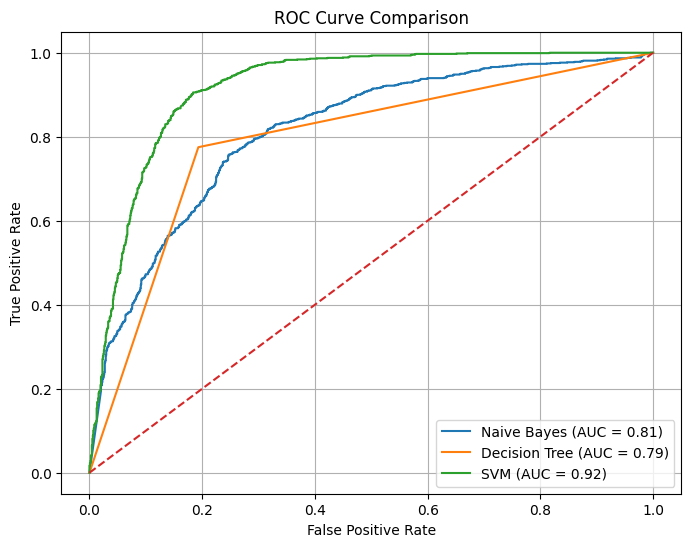

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#NB
nb_probs = nb.predict_proba(X_test)[:,1]

#DT
dt_probs = dt.predict_proba(X_test)[:,1]

# SVM
svm_probs = svm_model.predict_proba(X_test)[:,1]

# Calculate ROC values
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

nb_auc = auc(nb_fpr, nb_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
svm_auc = auc(svm_fpr, svm_tpr)


plt.figure(figsize=(8,6))
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.2f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_auc:.2f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


SVM performed the best because its ROC curve is highest and its AUC (0.92) is the biggest. Naive Bayes performed moderately well (AUC 0.81), and Decision Tree is the weakest (AUC 0.79). So overall, SVM gives the best predictions.

applying bagging to NB

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Bagging with Naive Bayes
bag_nb = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=50,
    random_state=42
)

bag_nb.fit(X_train, y_train)
y_pred = bag_nb.predict(X_test)

print("Bagging Naive Bayes Results")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Bagging Naive Bayes Results
Accuracy : 0.7057769816390506
Precision: 0.7961595273264401
Recall   : 0.5094517958412098

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.88      0.76      1175
           1       0.80      0.51      0.62      1058

    accuracy                           0.71      2233
   macro avg       0.73      0.70      0.69      2233
weighted avg       0.73      0.71      0.69      2233



bagging provided only a tiny improvement confirming that Naive Bayes is a stable, low-variance model and does not benefit much from bagging.

Applying Adaboost to DT

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


base_dt = DecisionTreeClassifier(max_depth=1, random_state=42)


ada_dt = AdaBoostClassifier(
    estimator=base_dt,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)


ada_dt.fit(X_train, y_train)


y_pred = ada_dt.predict(X_test)

# Evaluation
print("AdaBoost + Decision Tree Results")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


AdaBoost + Decision Tree Results
Accuracy : 0.812807881773399
Precision: 0.803030303030303
Recall   : 0.8015122873345936

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1175
           1       0.80      0.80      0.80      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



Applying AdaBoost to the Decision Tree improved the model’s performance: accuracy increased from 79.2% to 81.3%, while both precision and recall for class 1 rose by about 2–3%. Overall, boosting made the classifier more accurate and balanced in identifying both classes.